# Import and Install Dependencies

In [84]:
import cv2
import numpy as np
import os
from matplotlib  import pyplot as plt
import time
import mediapipe as mp

# Keypoints using Mediapipe

In [85]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [86]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False #set the image flag to not writeable  
    results = model.process(image) # Make predictions/run inference on the image  
    image.flags.writeable = True #m ake the image flags writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # change color back from RGB to BGR  
    
    return image, results
    
    #draw landmarks on

In [87]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [88]:
def draw_styled_landmarks(image, results):
    # Draw face Mesh connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),# BGR for colors
                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    
    # Draw Pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS
                            ,mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2)
                            )
    
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
                            ,mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            )
    
    
    # Draw Right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
                            , mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )

In [89]:

# mp_drawing.draw_landmarks??

In [98]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        
        # Read feed
        ret, frame = cap.read()
        
        # Make detaction
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        # draw_landmarks(image, results)
        draw_styled_landmarks(image , results)
        
        # Show to screen
        cv2.imshow('SignAI', image)
        
        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [91]:
# len(results.left_hand_landmarks.landmark)
frame

array([[[203, 204, 200],
        [203, 204, 200],
        [203, 204, 200],
        ...,
        [253, 251, 251],
        [252, 251, 251],
        [251, 251, 251]],

       [[203, 204, 200],
        [203, 204, 200],
        [203, 204, 200],
        ...,
        [252, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       [[203, 204, 200],
        [203, 204, 200],
        [203, 204, 200],
        ...,
        [251, 251, 251],
        [251, 251, 251],
        [251, 251, 251]],

       ...,

       [[170, 167, 157],
        [170, 167, 157],
        [170, 166, 157],
        ...,
        [137, 120, 104],
        [140, 123, 107],
        [140, 123, 107]],

       [[172, 167, 158],
        [172, 167, 158],
        [170, 166, 157],
        ...,
        [137, 120, 104],
        [139, 120, 105],
        [139, 120, 105]],

       [[172, 167, 158],
        [172, 167, 158],
        [171, 167, 158],
        ...,
        [137, 120, 104],
        [137, 118, 103],
        [138, 118, 103]]

In [92]:
# draw_landmarks(frame, results)
draw_styled_landmarks(frame,results)

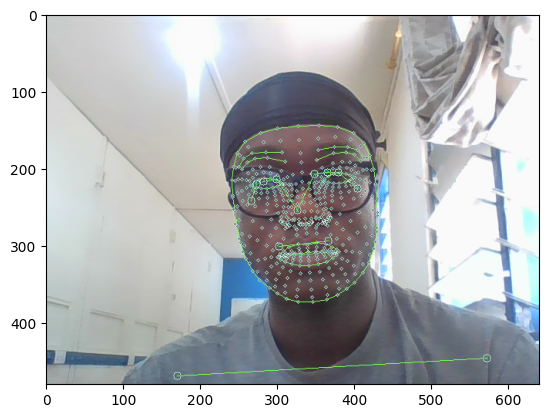

In [93]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extracting Keypoint values

In [99]:
# len(results.left_hand_landmarks.landmark)

21

In [ ]:
# for res in results.face_landmarks.landmark:
    # test = np.array([res.x, res.y, res.z, res.visibility ])


# pose = []
# for res in results.pose_landmarks.landmark:
    # test = np.array([res.x, res.y, res.z, res.visibility ])
    # pose.append(test)
    
# for res in results.left_hand_landmarks.landmark:
    # test = np.array([res.x, res.y, res.z, res.visibility ])
    
    
# for res in results.right_hand_landmarks.landmark:
    # test = np.array([res.x, res.y, res.z, res.visibility ])

In [104]:
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    left = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([face, pose, left, right])


In [105]:
extract_keypoints(results).shape

(1662,)

# Setup collections Folder

In [ ]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], X.shape[3], 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Rewriting the extraction function

In [ ]:
def extract_keypoints(results):
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    left = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    # Reshape the keypoints into a 5D array
    keypoints = np.concatenate([face, pose, left, right])
    keypoints = keypoints.reshape((-1, 1, 1, 1, keypoints.shape[0]))

    return keypoints

In [ ]:
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(1, 1, 1, 2106)))